# <center>BoomBikes - Bike Sharing Assignment</center>
A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br>
## Objective
The Company wants to:
- To identify the variables affecting the demand for bikes.
- To create a linear model that quantitatively relates demand for bikes with variables chosen.
- To know the accuracy of the model, i.e. How well these variables can predict demand for the bikes.

## Step 1: Reading and Understanding the Data
Importing relevant packages for data preparation, visualization and model building.

In [1]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

In [2]:
# importing visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing sklearn libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
# importing statsmodels libraries for model building
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [5]:
# Setting Configurations
## Setting the sns style
sns.set(style="whitegrid")

## To suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [6]:
# reading the day.csv dataset
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting Dataframe

In [7]:
# shape of the dataset
bike_data.shape

(730, 16)

In [8]:
# Information of dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# summary statistics of the bike_data dataframe
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing Null values

In [10]:
# null value count across all columns
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can observe that the bike_data dataframe has __Zero__ null values across all columns.<br>
### Removing duplicate records

In [11]:
# shape of the bike_data dataframe
bike_data.shape

(730, 16)

In [12]:
# Dropping duplicate records from the bike_data dataframe
bike_data.drop_duplicates(inplace=True)
bike_data.shape

(730, 16)

We can observe that there are __NO duplicate records__ found in the dataframe after trying to drop duplicates.
### Removing Redundant Columns

In [13]:
print(bike_data.shape)
bike_data.head(2)

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


Based on the defination of columns from Data dictionary, we can remove following columns.
- __`instant`__: record index. Dropping this since it is just an index.
- __`dteday`__: date column. Dropping this since we have month and year column.
- __`casual`__: count of casual users. Dropping this since it just count of non registered users.
- __`registered`__: count of registered users. Dropping this since it just count of registered users.
- __`atemp`__: Feeling temperature in Celsius. Dropping this since we already have temp column.

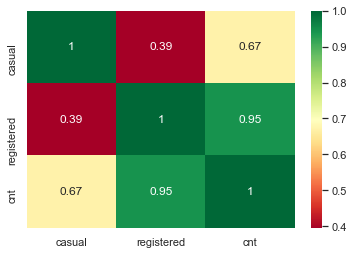

In [14]:
# Justification for dropping casual and registered columns
sns.heatmap(bike_data[['casual', 'registered', 'cnt']].corr(), annot=True, cmap="RdYlGn")
plt.show()

We can observe that `casual and registered` columns are _highly correlated_ to `cnt` column. <br>
Also by defination, cnt column is the __sum of casual and registered columns__. Hence we can drop them. <br><br>
Dropping `atemp` column:

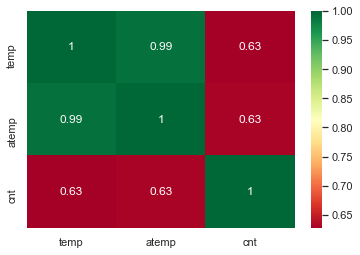

In [15]:
# Justification for dropping atemp column
sns.heatmap(bike_data[['temp', 'atemp', 'cnt']].corr(), annot=True, cmap="RdYlGn")
plt.show()

We can observe that `temp and atemp` columns are __highly correlated__ to each other which will result in __multicollinearity issue__ in model. Hence we can drop atemp column.

In [16]:
# Dropping irrelevant/redundant columns
columns_tobe_dropped = ['instant', 'dteday', 'casual', 'registered', 'atemp']
bike_data = bike_data.drop(columns_tobe_dropped, axis=1)
bike_data.shape

(730, 11)

## Step 2: Standardizing and Encoding Data

In [17]:
# get first 4 records of dataframe
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


Rounding the float columns to 2 decimals precision.

In [18]:
# rounding off to 2 decimal points
bike_data[['temp', 'hum', 'windspeed']] = bike_data[['temp', 'hum', 'windspeed']].round(decimals=2)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,43.70,12.52,1600


### Encoding Categorical Variables
Columns `season and weathersit` are encoded based on the values from Data Dictionary.
- __`season`__: Encoding season values as:- 1: Spring, 2: Summer, 3: Fall, 4: Winter
- __`mnth`__: Encoding mnth values as:- 1: Jan, 2: Feb, 3: Mar, 4: Apr, 5: May, 6: Jun, 7: Jul, 8: Aug, 9: Sep, 10: Oct, 11: Nov, 12: Dec
- __`weekday`__: Encoding weekday values as:- 0: Sun, 1: Mon, 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat
- __`weathersit`__: Encoding weathersit values as:- 1: Clear, 2: Misty_Cloudy, 3: Light_Rain_Snow, 4: Heavy_Rain_Snow

In [19]:
# mapping the categorical variables
bike_data['season'] = bike_data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_data['mnth'] = bike_data['mnth'].map(
    {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
)
bike_data['weekday'] = bike_data['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
bike_data['weathersit'] = bike_data['weathersit'].map(
    {1: 'Clear', 2: 'Misty_Cloudy', 3: 'Light_Rain_Snow', 4: 'Heavy_Rain_Snow'}
)

In [20]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty_Cloudy,14.11,80.58,10.75,985
1,Spring,0,Jan,0,Sun,0,Misty_Cloudy,14.90,69.61,16.65,801
2,Spring,0,Jan,0,Mon,1,Clear,8.05,43.73,16.64,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.20,59.04,10.74,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.31,43.70,12.52,1600


## Step 3: Visualizing Data 
Identifying and segregating Categorical and Continous variables based on the count of unique values.

In [21]:
# unique value count
bike_data.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
windspeed     426
temp          489
hum           589
cnt           695
dtype: int64

In [22]:
# splitting columns in to variable types
category_variables = ['yr', 'holiday', 'workingday', 'weathersit', 'weekday', 'season', 'mnth']
continous_variables = ['windspeed', 'temp', 'hum', 'cnt']

### Continous Variables

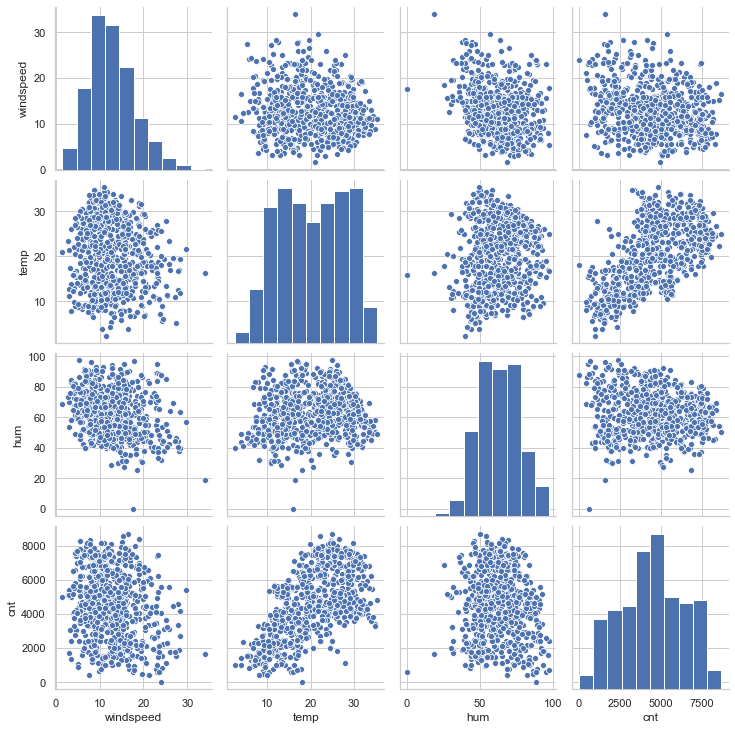

In [23]:
# plotting pairplot to study correlation of continous variables
sns.pairplot(bike_data, vars=continous_variables)
plt.show()

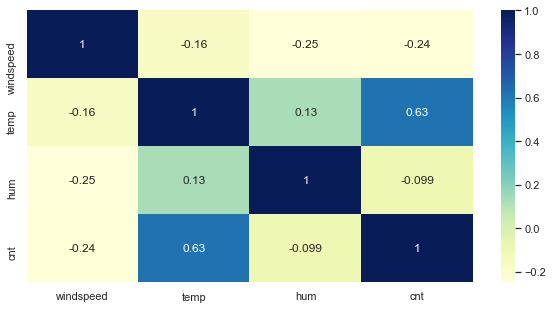

In [24]:
# correlation between numeric variables
plt.figure(figsize=(10, 5))
sns.heatmap(bike_data[continous_variables].corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Observations:
- We can observe that `temp` column is highest __positively correlated__ variable to `cnt` column.
### Categorical Variables

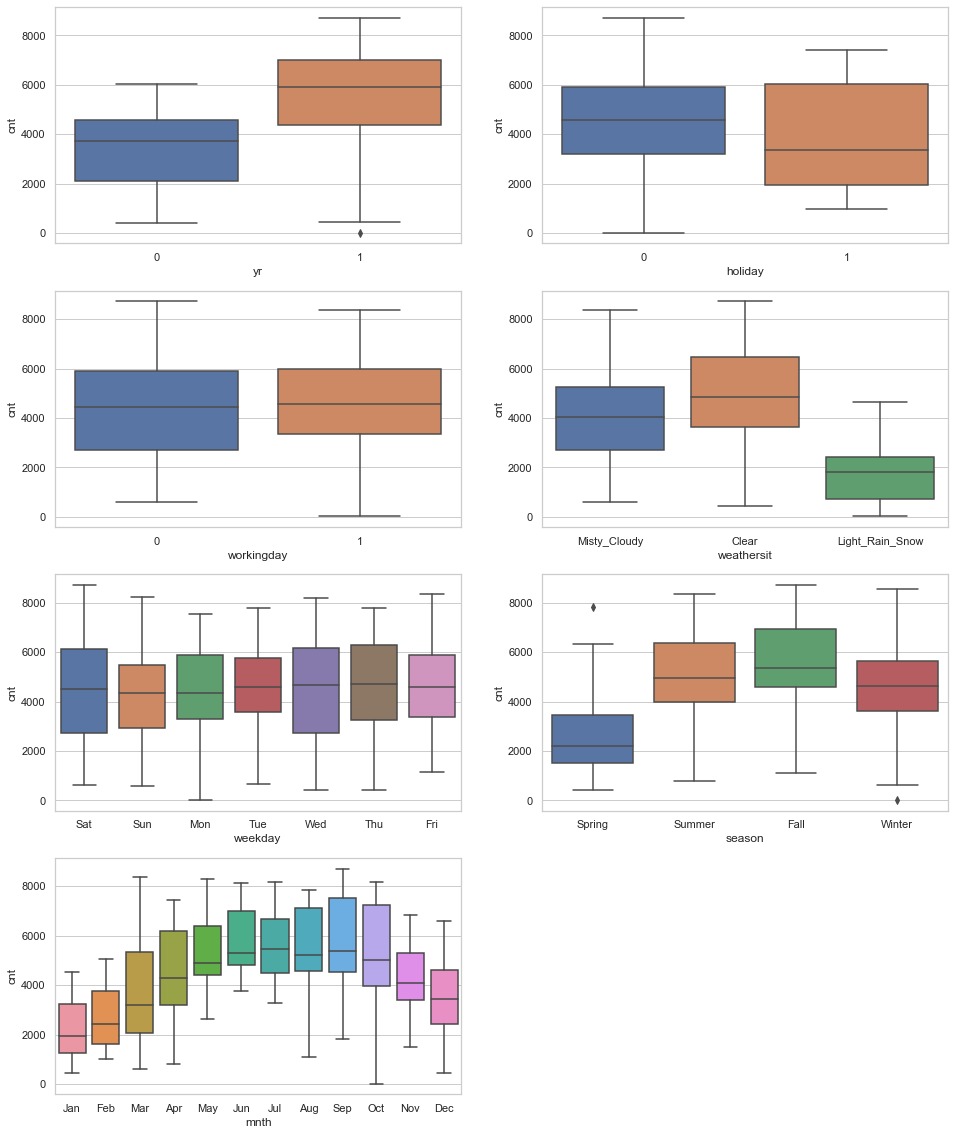

In [25]:
# plotting box plots for categorical variables 
plt.figure(figsize=(16, 20))
for i in range(len(category_variables)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=category_variables[i], y='cnt', data=bike_data)
plt.show()

#### Further analysis of categorical variables

In [26]:
# function to plot categorical variables
def plot_categorical(column, figsize_x, figsize_y):
    """
    Function to plot categorical variables to see trends.
    column           : The categorical variable to plot
    figsize_x        : Width of the plot in inches
    figsize_y        : Height of the plot in inches
    
    return           : None
    """
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.subplot(1, 2, 1)
    sns.barplot(column, 'cnt', data=bike_data)
    plt.subplot(1, 2, 2)
    sns.barplot(column, 'cnt', data=bike_data, hue='yr', palette='Paired')
    plt.legend(labels=['2018', '2019'])

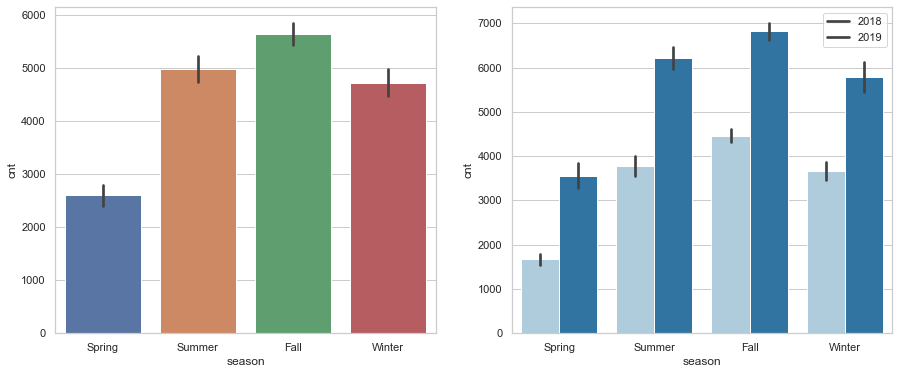

In [27]:
# season variable analysis
plot_categorical('season', 15, 6)

###### Inference:
- Seasons Fall and Summer see a higher number of bike rentals contributing almost 50% of total bookings with a median of 5000 bookings per season over 2 years (2018-19).
- This indicates that Season is a good variable for analysis as we see a varying trend across different seasons.

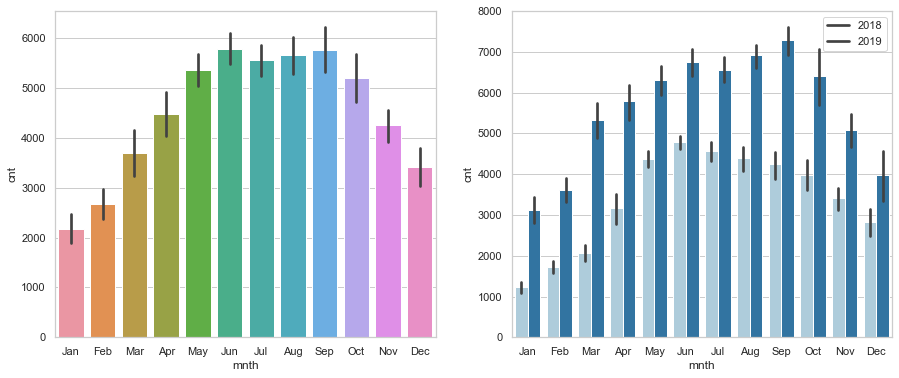

In [28]:
# month variable analysis
plot_categorical('mnth', 15, 6)

###### Inference:
- Months `May to October` see a higher number of bike rentals contributing almost 40-45% of total bookings with a median of 5000 bookings per month over 2 years (2018-19).
- This indicates that Month is a good variable for analysis as we see a varying trend across different seasons.

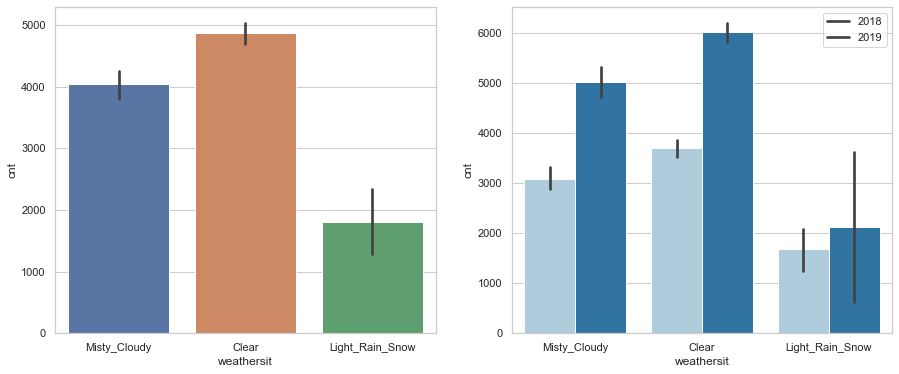

In [29]:
# weathersit variable analysis
plot_categorical('weathersit', 15, 6)

###### Inference:
- Weather `Clear and Cloudy` see a higher number of bike rentals contributing almost 65-70% of total bookings where-as a drastic decline in demand is seen during winter.
- This indicates that Weather is a good variable for analysis as we see a varying trend across different weathers.

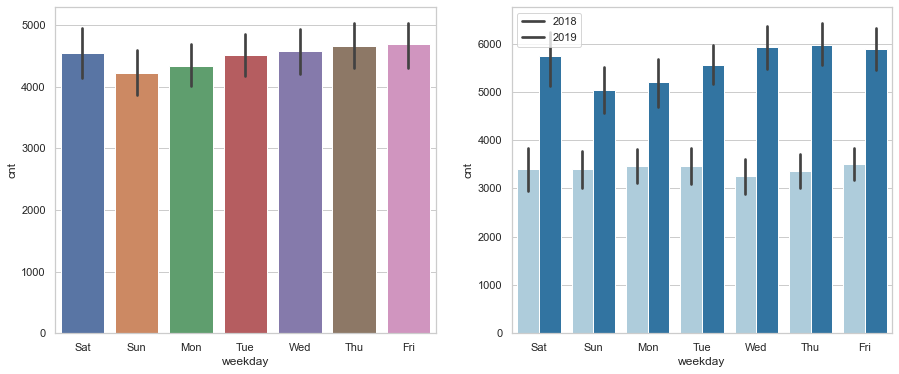

In [30]:
# weekday variable analysis
plot_categorical('weekday', 15, 6)

###### Inference:
- The booking demand is __almost constant__ with a median of 4000 bookings across all the days with a _minimal variance_ of around 1.5-2%.
- This indicates that _Weekday has NO significant influence_ on the demand for bike rentals.


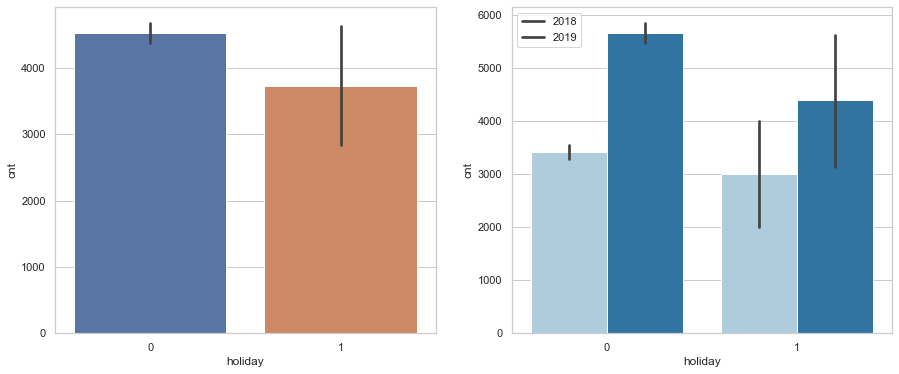

In [31]:
# holiday variable analysis
plot_categorical('holiday', 15, 6)

###### Inference:
- Maximum number of bookings of almost 97% happens during the non-holidays indicating a __clear bias__ in the data collected.
- This indicates that __Holiday is NOT a good variable__ for analysis as there is a clear bias in the data.

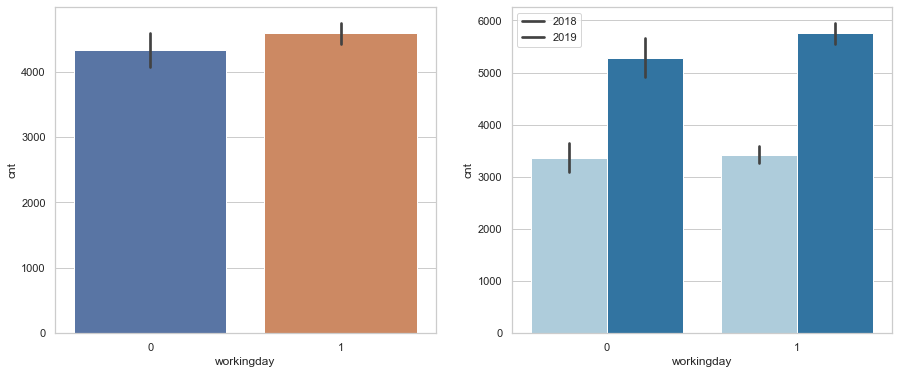

In [32]:
# workingday variable analysis
plot_categorical('workingday', 15, 6)

###### Inference:
- Maximum number of bookings of almost 65-70% happens during the working days with the median of 5000 bookings.
- This indicates that __Working day is a good variable for analysis__.

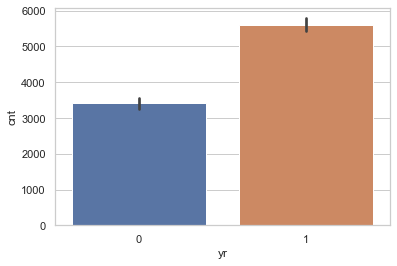

In [33]:
# year variable analysis
sns.barplot('yr', 'cnt', data=bike_data)
plt.show()

###### Inference:
- The Number of bookings in 2019 increased almost 95% of the bookings of previous year with the median of 2019 being close to 2018’s total bookings. 
- This indicates that __Year (yr)__ is a __good variable for analysis__.

#### Heatmap for correlation among all variables

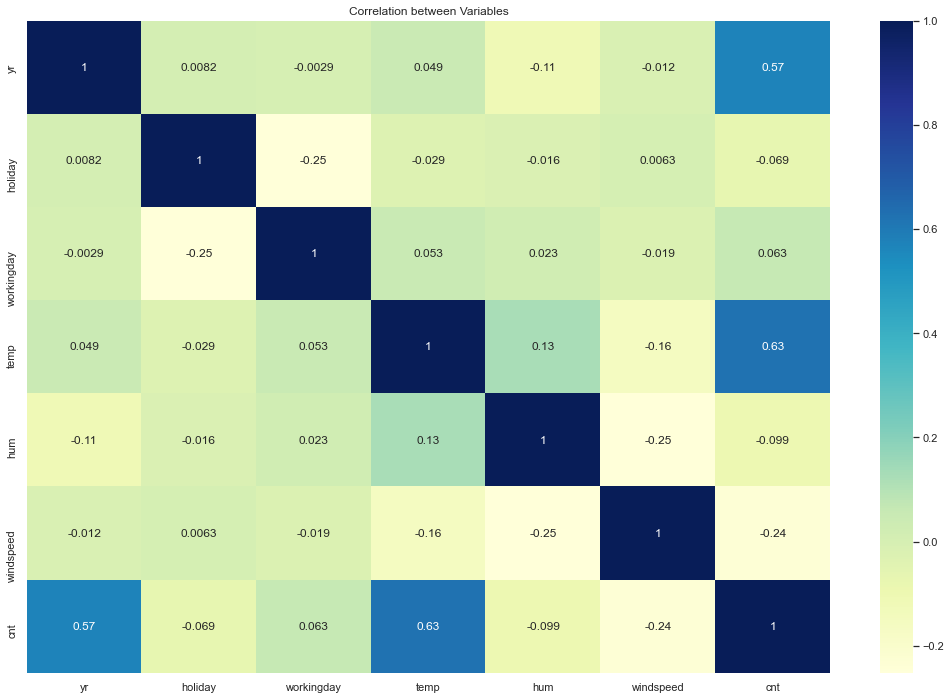

In [34]:
plt.figure(figsize=(18, 12))
sns.heatmap(bike_data.corr(), cmap='YlGnBu', annot=True)
plt.title("Correlation between Variables")
plt.show()

##### Inference
- Year (yr) is __positively correlated__ to count (cnt) of bike rentals
- Temperature (temp) is __positively correlated__ to count (cnt) of bike rentals
- Holiday, humidity (hum) and windspeed are __negatively correlated__ to count (cnt) of bike rentals

## Step 3: Data Preparation
### Dummy variables
Creating a mapping function to create dummy variables for required columns

In [35]:
# function to create dummy variables
def create_dummy(column, dataframe):
    """
    Function to create dummy variables for passed columns and merge it to main dataframe.
    column           : The variable for dummy variable creation
    dataframe        : Main dataframe to merge dummy data with
    
    return           : Merged Dataframe
    """
    tmp = pd.get_dummies(dataframe[column], drop_first=True)
    dataframe = pd.concat([dataframe, tmp], axis=1)
    dataframe.drop([column], axis=1, inplace=True)
    return dataframe

In [36]:
bike_data = create_dummy('season', bike_data)
bike_data = create_dummy('mnth', bike_data)
bike_data = create_dummy('weekday', bike_data)
bike_data = create_dummy('weathersit', bike_data)

In [37]:
print(bike_data.shape)
bike_data.head()

(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain_Snow,Misty_Cloudy
0,0,0,0,14.11,80.58,10.75,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.90,69.61,16.65,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,59.04,10.74,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Train and Test Sets
### Splitting Data

In [38]:
# Splitting our main data set in to test and train set
np.random.seed(0)
bike_train_set, bike_test_set = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)
print(bike_train_set.shape, bike_test_set.shape)

(510, 29) (219, 29)


### Rescaling Data
Scaling is required as the columns are needed to on same scale for a better prediction.
There are 2 types of Scaling:
- Normalization: MinMax Scaling
- Standardization: Mean=0 and SD=1
<br><br>
We will be using Normalization technique for scaling

In [39]:
# Instantiate Object
scaler = MinMaxScaler()

In [40]:
# applying scaling for continous variables
num_vars = ['windspeed', 'temp', 'hum', 'cnt']
bike_train_set[num_vars] = scaler.fit_transform(bike_train_set[num_vars])
bike_train_set.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain_Snow,Misty_Cloudy
653,1,0,1,0.509875,0.575330,0.300930,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815254,0.725680,0.264678,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442419,0.640148,0.255374,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245214,0.498042,0.663138,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395624,0.504534,0.188643,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
# summary stats of bike_train_set
bike_train_set.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain_Snow,Misty_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537300,0.650378,0.320866,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225801,0.145885,0.169770,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339866,0.538644,0.199230,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540565,0.653751,0.296760,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735339,0.754818,0.414501,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking Multicollinearity using Heatmap

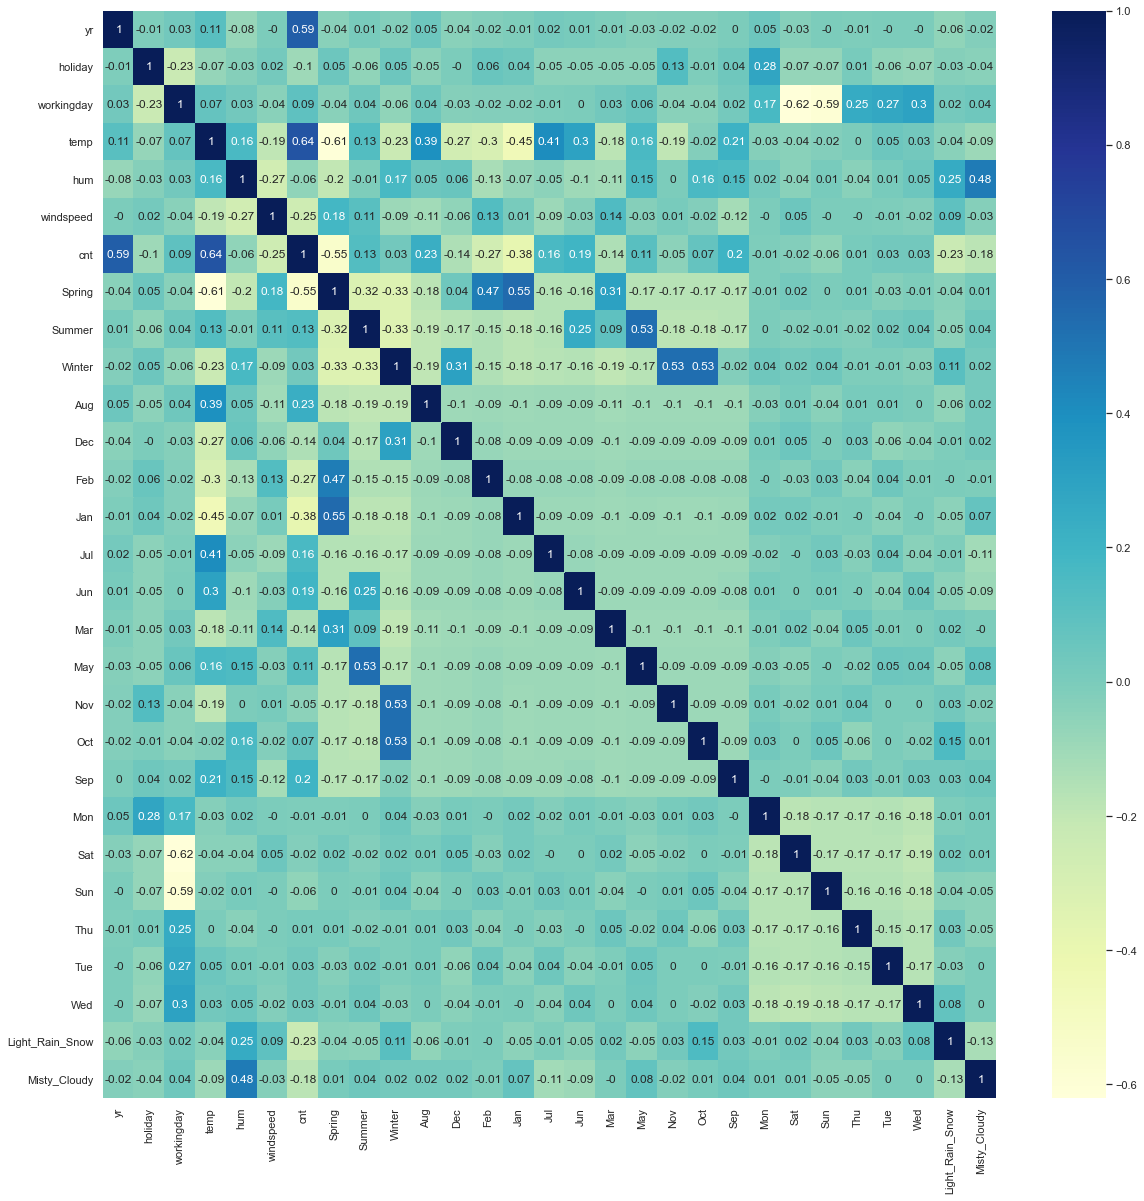

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(bike_train_set.corr().round(2), cmap='YlGnBu', annot=True)
plt.show()

##### Inference:
- workingday has a high negative correlation with Sat & Sun where workingday is zero
- temp and yr have strong positive correlation with cnt
- Misty weather and humidity have high positive correlation
- Spring has high negative correlation with cnt

## Step 5: Building and Training the Model
#### Dividing in to X and y sets

In [43]:
y_train = bike_train_set.pop('cnt')
X_train = bike_train_set

#### Recursive Feature Elimination (RFE)

In [44]:
# Running RFE to select 15 predictor variables
# Instantiate Linear model object
lm = LinearRegression()

# fitting line
lm.fit(X_train, y_train)

# Running RFE to output 15 variables
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [45]:
# Selected variables
list(zip(X_train.columns, rfe.ranking_, rfe.support_))

[('yr', 1, True),
 ('holiday', 1, True),
 ('workingday', 1, True),
 ('temp', 1, True),
 ('hum', 1, True),
 ('windspeed', 1, True),
 ('Spring', 1, True),
 ('Summer', 1, True),
 ('Winter', 1, True),
 ('Aug', 6, False),
 ('Dec', 3, False),
 ('Feb', 4, False),
 ('Jan', 1, True),
 ('Jul', 1, True),
 ('Jun', 13, False),
 ('Mar', 14, False),
 ('May', 5, False),
 ('Nov', 2, False),
 ('Oct', 10, False),
 ('Sep', 1, True),
 ('Mon', 8, False),
 ('Sat', 1, True),
 ('Sun', 7, False),
 ('Thu', 11, False),
 ('Tue', 9, False),
 ('Wed', 12, False),
 ('Light_Rain_Snow', 1, True),
 ('Misty_Cloudy', 1, True)]

In [46]:
# columns where rfe support is True
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Light_Rain_Snow',
       'Misty_Cloudy'],
      dtype='object')

In [47]:
# columns where rfe support is False
X_train.columns[~(rfe.support_)]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [48]:
# dropping columns with support is False
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Jan,Jul,Sep,Sat,Light_Rain_Snow,Misty_Cloudy
653,1,0,1,0.509875,0.575330,0.300930,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815254,0.725680,0.264678,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442419,0.640148,0.255374,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245214,0.498042,0.663138,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395624,0.504534,0.188643,0,1,0,0,0,0,1,0,1


### Builing model Manually using statsmodels
Creating a function to calculate Variance Inflation Factor (VIF)

In [49]:
# defining a function to calculate VIF
def calculate_VIF(X_set):
    """
    Function to check the VIF of the data set.
    X_set       : The dataset without target variable
    
    return      : VIF
    """
    # creating a dataframe with VIF of all variables
    vif = pd.DataFrame()
    vif['Features'] = X_set.columns
    vif['VIF'] = [variance_inflation_factor(X_set.values, i) for i in range(X_set.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

#### Model 1

In [50]:
# adding constant variable
X_train_sm = sm.add_constant(X_train_rfe)

# creating the model and fitting the line
lm_1 = sm.OLS(y_train, X_train_sm).fit()

# model summary
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.34e-191
Time:                        22:57:27   Log-Likelihood:                 519.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2511      0.036      6.948      0.000       0.180       0.322
yr                  0.2305      0.008     28.805      0.000       0.215       0.246
holiday            -0.0585      0.027     -2.179      0.030      -0.111      -0.006
workingday          0.0435      0.012      3.780      0.000       0.021       0.066
temp                0.5099      0.034     14.850      0.000       0.442       0.577
hum                -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed          -0.1860      0.025     -7.303      0.000      -0.236      -0.136
Spring             -0.0508      0.021     -2.461      0.014      -0.091      -0.010
Summer              0.0497      0.015      3.346      0.001       0.020       0.079
Winter              0.0944      0.017      5.478      0.000       0.061       0.128
Jan                -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul                -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep                 0.0812      0.016      4.933      0.000       0.049       0.113
Sat                 0.0537      0.014      3.707      0.000       0.025       0.082
Light_Rain_Snow    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Misty_Cloudy       -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.340   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.546
Skew:                          -0.676   Prob(JB):                     8.33e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Checking the variance inflation factor
calculate_VIF(X_train_sm)

,Features,VIF
0,const,84.61
7,Spring,5.08
4,temp,3.89
9,Winter,3.60
8,Summer,2.64
5,hum,1.92
3,workingday,1.88
13,Sat,1.78
10,Jan,1.57
15,Misty_Cloudy,1.57


##### Inference:
We can observe the column __`Jan`__ has a __high p-value (0.048)__ and __Low VIF (1.57)__. Hence we can proceed to __drop__ the column.

In [52]:
# dropping January column
X_train_new = X_train_rfe.drop('Jan', axis=1)

#### Model 2

In [53]:
# adding constant variable
X_train_sm = sm.add_constant(X_train_new)

# creating the model and fitting the line
lm_2 = sm.OLS(y_train, X_train_sm).fit()

# model summary
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.15e-191
Time:                        22:57:28   Log-Likelihood:                 517.85
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2394      0.036      6.695      0.000       0.169       0.310
yr                  0.2297      0.008     28.658      0.000       0.214       0.245
holiday            -0.0595      0.027     -2.206      0.028      -0.112      -0.007
workingday          0.0432      0.012      3.743      0.000       0.021       0.066
temp                0.5279      0.033     15.895      0.000       0.463       0.593
hum                -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed          -0.1807      0.025     -7.112      0.000      -0.231      -0.131
Spring             -0.0554      0.021     -2.695      0.007      -0.096      -0.015
Summer              0.0526      0.015      3.552      0.000       0.024       0.082
Winter              0.1003      0.017      5.889      0.000       0.067       0.134
Jul                -0.0549      0.018     -3.035      0.003      -0.090      -0.019
Sep                 0.0818      0.016      4.955      0.000       0.049       0.114
Sat                 0.0532      0.015      3.661      0.000       0.025       0.082
Light_Rain_Snow    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Misty_Cloudy       -0.0579      0.010     -5.560      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.875   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.433
Skew:                          -0.661   Prob(JB):                     3.95e-35
Kurtosis:                       5.389   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Checking the variance inflation factor
calculate_VIF(X_train_sm)

,Features,VIF
0,const,82.36
7,Spring,5.02
4,temp,3.62
9,Winter,3.49
8,Summer,2.61
5,hum,1.91
3,workingday,1.88
12,Sat,1.78
14,Misty_Cloudy,1.57
10,Jul,1.49


##### Inference:
We can observe the column __`holiday`__ has a __high p-value (0.028)__ and __Low VIF (1.16)__. Hence we can proceed to __drop__ the column.

In [55]:
# dropping holiday column
X_train_new = X_train_new.drop('holiday', axis=1)

#### Model 3

In [56]:
# adding constant variable
X_train_sm = sm.add_constant(X_train_new)

# creating the model and fitting the line
lm_3 = sm.OLS(y_train, X_train_sm).fit()

# model summary
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          8.65e-192
Time:                        22:57:28   Log-Likelihood:                 515.35
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2298      0.036      6.451      0.000       0.160       0.300
yr                  0.2300      0.008     28.578      0.000       0.214       0.246
workingday          0.0521      0.011      4.790      0.000       0.031       0.073
temp                0.5280      0.033     15.837      0.000       0.462       0.593
hum                -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed          -0.1813      0.026     -7.108      0.000      -0.231      -0.131
Spring             -0.0565      0.021     -2.737      0.006      -0.097      -0.016
Summer              0.0530      0.015      3.562      0.000       0.024       0.082
Winter              0.0993      0.017      5.812      0.000       0.066       0.133
Jul                -0.0537      0.018     -2.961      0.003      -0.089      -0.018
Sep                 0.0797      0.017      4.818      0.000       0.047       0.112
Sat                 0.0622      0.014      4.438      0.000       0.035       0.090
Light_Rain_Snow    -0.2455      0.026     -9.382      0.000      -0.297      -0.194
Misty_Cloudy       -0.0576      0.010     -5.512      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.204
Skew:                          -0.707   Prob(JB):                     3.68e-41
Kurtosis:                       5.600   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Checking the variance inflation factor
calculate_VIF(X_train_sm)

,Features,VIF
0,const,81.15
6,Spring,5.02
3,temp,3.62
8,Winter,3.49
7,Summer,2.61
4,hum,1.91
2,workingday,1.65
11,Sat,1.64
13,Misty_Cloudy,1.57
9,Jul,1.49


##### Inference:
We can observe the column __`Spring`__ has __High VIF (5.02)__. Hence we can proceed to __drop__ the column.

In [58]:
# dropping holiday column
X_train_new = X_train_new.drop('Spring', axis=1)

#### Model 4

In [59]:
# adding constant variable
X_train_sm = sm.add_constant(X_train_new)

# creating the model and fitting the line
lm_4 = sm.OLS(y_train, X_train_sm).fit()

# model summary
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.30e-191
Time:                        22:57:28   Log-Likelihood:                 511.53
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1705      0.028      5.990      0.000       0.115       0.226
yr                  0.2286      0.008     28.277      0.000       0.213       0.244
workingday          0.0527      0.011      4.816      0.000       0.031       0.074
temp                0.5961      0.022     26.677      0.000       0.552       0.640
hum                -0.1693      0.038     -4.514      0.000      -0.243      -0.096
windspeed          -0.1886      0.026     -7.387      0.000      -0.239      -0.138
Summer              0.0815      0.011      7.651      0.000       0.061       0.102
Winter              0.1365      0.010     13.066      0.000       0.116       0.157
Jul                -0.0442      0.018     -2.466      0.014      -0.079      -0.009
Sep                 0.0926      0.016      5.802      0.000       0.061       0.124
Sat                 0.0627      0.014      4.446      0.000       0.035       0.090
Light_Rain_Snow    -0.2404      0.026     -9.151      0.000      -0.292      -0.189
Misty_Cloudy       -0.0551      0.010     -5.261      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       65.489   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.553
Skew:                          -0.687   Prob(JB):                     2.03e-33
Kurtosis:                       5.280   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Checking the variance inflation factor
calculate_VIF(X_train_sm)

,Features,VIF
0,const,51.13
4,hum,1.89
2,workingday,1.65
10,Sat,1.64
3,temp,1.60
12,Misty_Cloudy,1.56
8,Jul,1.43
6,Summer,1.33
7,Winter,1.29
11,Light_Rain_Snow,1.24


##### Inference:
We can observe the column __`Jul`__ has a __High p-value__ considered to other variables. Hence we __drop__ the column as the other p-values are zero except Jul column.

In [61]:
# dropping July column
X_train_new = X_train_new.drop('Jul', axis=1)

#### Model 5

In [62]:
# adding constant variable
X_train_sm = sm.add_constant(X_train_new)

# creating the model and fitting the line
lm_5 = sm.OLS(y_train, X_train_sm).fit()

# model summary
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.94e-191
Time:                        22:57:28   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1698      0.029      5.935      0.000       0.114       0.226
yr                  0.2294      0.008     28.269      0.000       0.213       0.245
workingday          0.0536      0.011      4.874      0.000       0.032       0.075
temp                0.5710      0.020     28.557      0.000       0.532       0.610
hum                -0.1613      0.038     -4.295      0.000      -0.235      -0.088
windspeed          -0.1862      0.026     -7.261      0.000      -0.237      -0.136
Summer              0.0899      0.010      8.859      0.000       0.070       0.110
Winter              0.1406      0.010     13.575      0.000       0.120       0.161
Sep                 0.1025      0.016      6.608      0.000       0.072       0.133
Sat                 0.0630      0.014      4.450      0.000       0.035       0.091
Light_Rain_Snow    -0.2439      0.026     -9.249      0.000      -0.296      -0.192
Misty_Cloudy       -0.0553      0.011     -5.255      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       72.649   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.934
Skew:                          -0.754   Prob(JB):                     3.42e-37
Kurtosis:                       5.372   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Checking the variance inflation factor
calculate_VIF(X_train_sm)

,Features,VIF
0,const,51.13
4,hum,1.87
2,workingday,1.65
9,Sat,1.64
11,Misty_Cloudy,1.56
3,temp,1.27
7,Winter,1.25
10,Light_Rain_Snow,1.24
6,Summer,1.19
5,windspeed,1.18


##### Inference:
We can observe the all columns have __Zero p-value and VIF less than 2__. Hence we cannot drop any other column.<br>
Since both are in acceptable limits, We can analyze the correlation between the remaining variables.

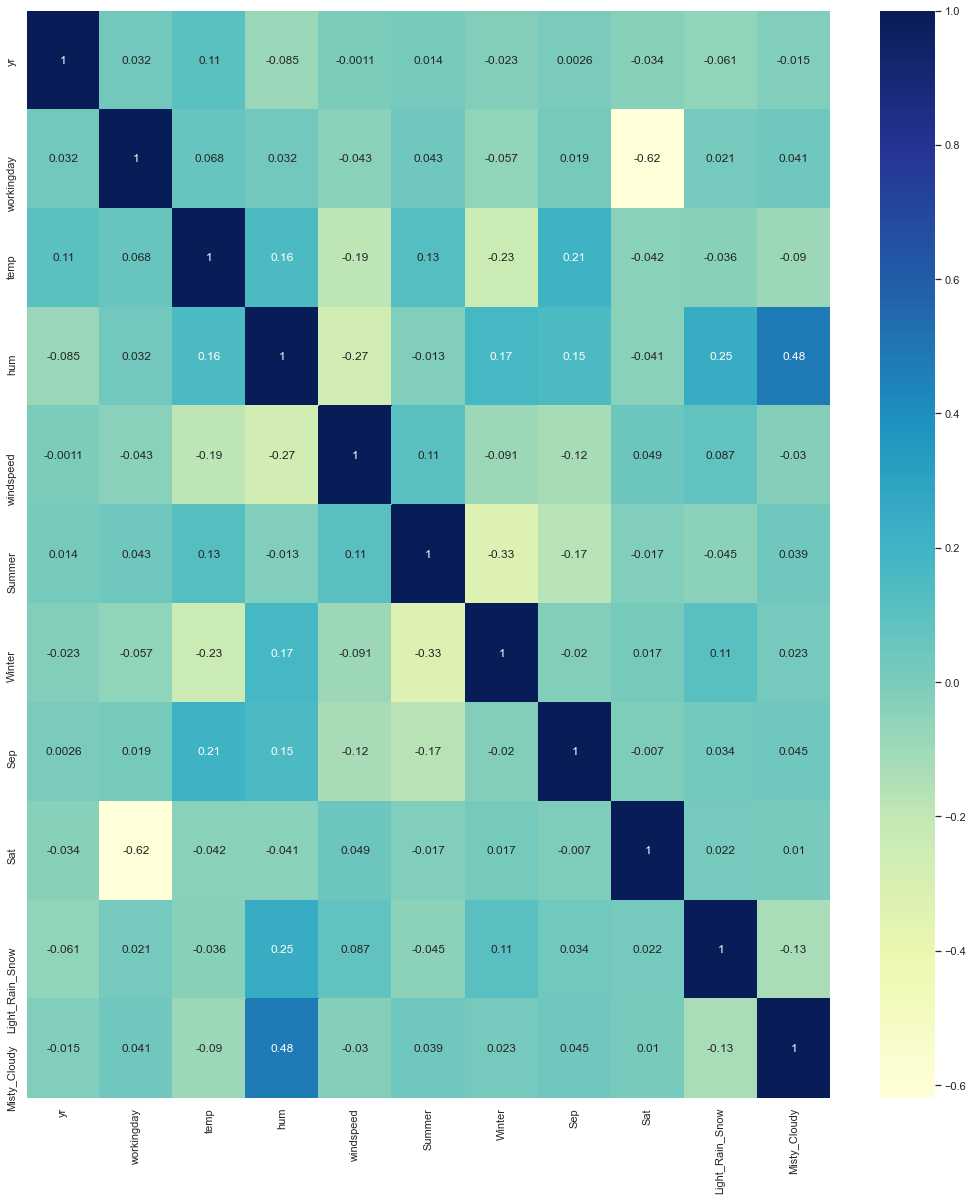

In [64]:
# Heatmap to show correlaion between variables of model 5
plt.figure(figsize = (18, 20))
sns.heatmap(X_train_new.corr(), annot=True, cmap="YlGnBu")
plt.show()

We can observe that __`workingday`__ and __`Sat`__ have a high negative correlation. <br>
Hence we can proceed to drop them starting with __`workingday`__.

In [65]:
# dropping workingday column
X_train_new = X_train_new.drop('workingday', axis=1)

#### Model 6

In [66]:
# adding constant variable
X_train_sm = sm.add_constant(X_train_new)

# creating the model and fitting the line
lm_6 = sm.OLS(y_train, X_train_sm).fit()

# model summary
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.90e-187
Time:                        22:57:29   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -971.1
Df Residuals:                     499   BIC:                            -924.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2164      0.028      7.850      0.000       0.162       0.271
yr                  0.2297      0.008     27.679      0.000       0.213       0.246
temp                0.5759      0.020     28.204      0.000       0.536       0.616
hum                -0.1720      0.038     -4.487      0.000      -0.247      -0.097
windspeed          -0.1904      0.026     -7.265      0.000      -0.242      -0.139
Summer              0.0911      0.010      8.778      0.000       0.071       0.111
Winter              0.1388      0.011     13.111      0.000       0.118       0.160
Sep                 0.1033      0.016      6.512      0.000       0.072       0.134
Sat                 0.0201      0.011      1.774      0.077      -0.002       0.042
Light_Rain_Snow    -0.2335      0.027     -8.690      0.000      -0.286      -0.181
Misty_Cloudy       -0.0506      0.011     -4.724      0.000      -0.072      -0.030
==============================================================================
Omnibus:                       77.141   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.127
Skew:                          -0.816   Prob(JB):                     1.88e-37
Kurtosis:                       5.301   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Checking the variance inflation factor
calculate_VIF(X_train_sm)

,Features,VIF
0,const,45.41
3,hum,1.86
10,Misty_Cloudy,1.55
2,temp,1.27
6,Winter,1.25
9,Light_Rain_Snow,1.23
5,Summer,1.19
4,windspeed,1.18
7,Sep,1.11
1,yr,1.03


##### Inference:
We can observe the column __`Sat`__ has a __High p-value__ considered to other variables. Hence we __drop__ the column as the other variable's p-values are zero except Sat column.

In [68]:
# dropping Saturday column
X_train_new = X_train_new.drop('Sat', axis=1)

#### Model 7

In [69]:
# adding constant variable
X_train_sm = sm.add_constant(X_train_new)

# creating the model and fitting the line
lm_7 = sm.OLS(y_train, X_train_sm).fit()

# model summary
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     277.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          5.31e-188
Time:                        22:57:29   Log-Likelihood:                 494.94
No. Observations:                 510   AIC:                            -969.9
Df Residuals:                     500   BIC:                            -927.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2215      0.027      8.060      0.000       0.168       0.276
yr                  0.2292      0.008     27.575      0.000       0.213       0.246
temp                0.5755      0.020     28.127      0.000       0.535       0.616
hum                -0.1755      0.038     -4.574      0.000      -0.251      -0.100
windspeed          -0.1890      0.026     -7.202      0.000      -0.241      -0.137
Summer              0.0909      0.010      8.739      0.000       0.070       0.111
Winter              0.1391      0.011     13.114      0.000       0.118       0.160
Sep                 0.1034      0.016      6.506      0.000       0.072       0.135
Light_Rain_Snow    -0.2320      0.027     -8.617      0.000      -0.285      -0.179
Misty_Cloudy       -0.0499      0.011     -4.650      0.000      -0.071      -0.029
==============================================================================
Omnibus:                       71.035   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.087
Skew:                          -0.743   Prob(JB):                     6.36e-36
Kurtosis:                       5.328   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Checking the variance inflation factor
calculate_VIF(X_train_sm)

,Features,VIF
0,const,44.92
3,hum,1.86
9,Misty_Cloudy,1.54
2,temp,1.27
6,Winter,1.25
8,Light_Rain_Snow,1.23
5,Summer,1.19
4,windspeed,1.18
7,Sep,1.11
1,yr,1.03


##### Inference:
We can observe the all columns have __Zero p-value and VIF less than 2__. Hence we cannot drop any other columns. <br>
Since the ___p-value and VIF are in acceptable limits___, we consider __Model 7__ as the final model.

## Step 6: Residual Analysis on Trained Data
We validate the assumptions made to our linear regression model.

### Errors are Normally Distributed
Checking if the error terms are also normally distributed.

In [71]:
X_train_sm.head()

,const,yr,temp,hum,windspeed,Summer,Winter,Sep,Light_Rain_Snow,Misty_Cloudy
653,1.0,1,0.509875,0.575330,0.300930,0,1,0,0,0
576,1.0,1,0.815254,0.725680,0.264678,0,0,0,0,0
426,1.0,1,0.442419,0.640148,0.255374,0,0,0,0,1
728,1.0,1,0.245214,0.498042,0.663138,0,0,0,0,0
482,1.0,1,0.395624,0.504534,0.188643,1,0,0,0,1


In [72]:
# making predictions
y_train_pred = lm_7.predict(X_train_sm)

In [73]:
# calculating residuals 
residuals = y_train - y_train_pred

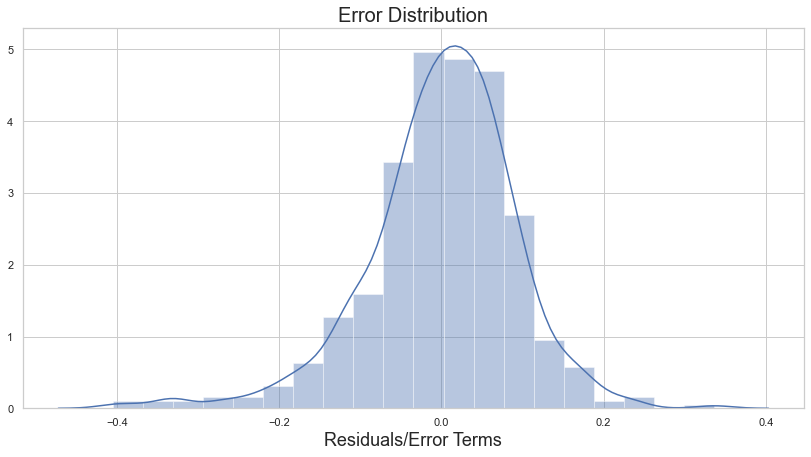

In [74]:
# plotting error distribution
plt.figure(figsize=(14,7))
sns.distplot(residuals, bins=20)
plt.title('Error Distribution', fontsize=20)
plt.xlabel('Residuals/Error Terms', fontsize=18)
plt.show()

We can observe that __errors follow a normal distribution__ centered around mean with zero.

### Linear Relationship

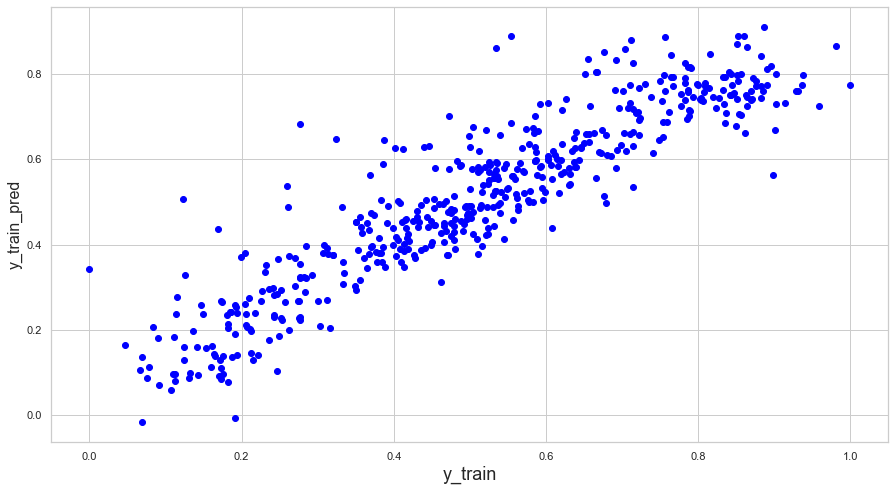

In [75]:
# Plotting y_train and y_train_pred to understand the spread.
plt.figure(figsize=(15,8))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

We can observe that the predicted values follow a linear relationship with the actual values.
### Homoscedasticity
##### Visualizing the Fit of the test set

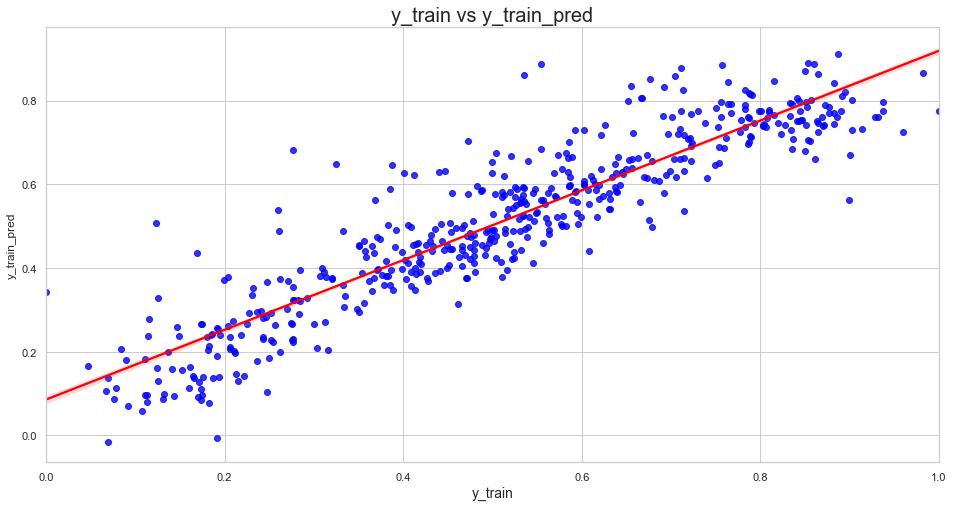

In [76]:
# Regression plot
plt.figure(figsize=(16, 8))
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=14)
plt.ylabel('y_train_pred', fontsize=12)
plt.show()

We can observe that the variance of data points follow __NO particular pattern__.
### No Multicollinearity

In [77]:
# calculate VIF
calculate_VIF(X_train_sm)

,Features,VIF
0,const,44.92
3,hum,1.86
9,Misty_Cloudy,1.54
2,temp,1.27
6,Winter,1.25
8,Light_Rain_Snow,1.23
5,Summer,1.19
4,windspeed,1.18
7,Sep,1.11
1,yr,1.03


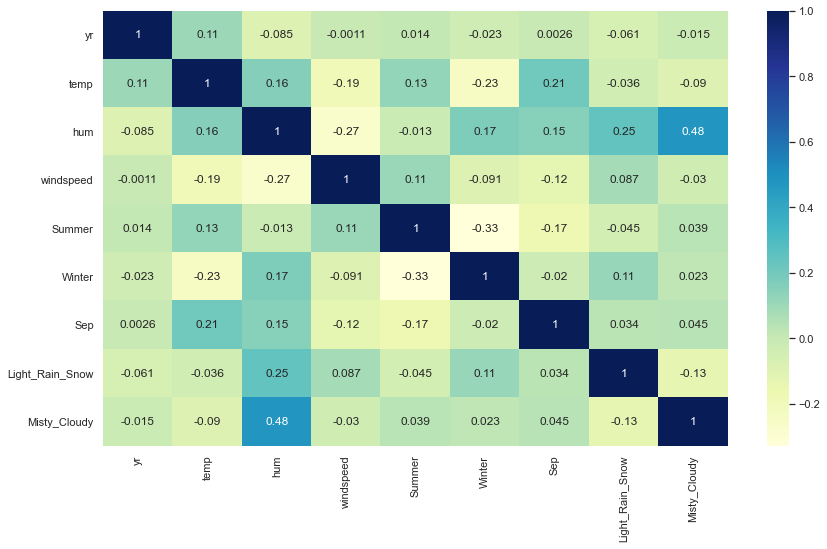

In [78]:
# correlation between numeric variables
plt.figure(figsize=(14, 8))
sns.heatmap(X_train_new.corr(), annot=True, cmap="YlGnBu")
plt.show()

We can observe that the __VIF is in acceptable limits i.e., less than 5%__. Hence there is no multicollinearity in the model.<br>
All the assumptions of multiple linear regression model are satisfied.

### Error Terms are Independent to each other

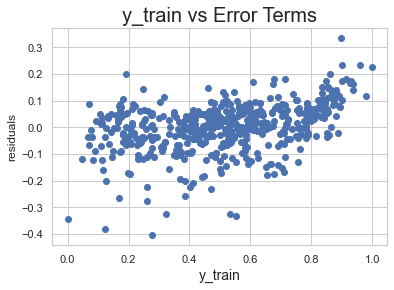

In [79]:
# scatter plot for error terms and X_train data
plt.scatter(y_train, residuals)
plt.title('y_train vs Error Terms', fontsize=20)
plt.xlabel('y_train', fontsize=14)
plt.ylabel('residuals', fontsize=12)
plt.show()

The dependence between the error terms is referred to as Autocorrelation and is identified by __Durbin-Watson test__. <br>
The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.<br>
__Durbin-Watson:	2.034__

## Step 7: Predictions Using Test Data

In [80]:
# test data set
bike_test_set.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain_Snow,Misty_Cloudy
184,0,1,0,29.79,63.79,5.46,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.08,59.21,7.63,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.27,81.29,13.25,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.43,42.42,13.42,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.32,30.50,19.58,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Scaling of test data set

In [81]:
# applying scaling for continous variables of test data set
## creating num_vars list
num_vars = ['windspeed', 'temp', 'hum', 'cnt']
bike_test_set[num_vars] = scaler.transform(bike_test_set[num_vars])
bike_test_set.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain_Snow,Misty_Cloudy
184,0,1,0,0.831662,0.657358,0.084376,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901246,0.610161,0.153994,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.512002,0.837696,0.334296,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881495,0.437139,0.339750,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817381,0.314303,0.537376,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing Test Data in to X and Y sets

In [82]:
# creating X and y sets
y_test = bike_test_set.pop('cnt')
X_test = bike_test_set

In [83]:
# summary statistics of X_test
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain_Snow,Misty_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558972,0.638521,0.313450,0.255708,0.264840,0.232877,0.059361,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233671,0.148978,0.159911,0.437258,0.442259,0.423633,0.236840,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046794,0.261954,-0.042669,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354603,0.527257,0.198588,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558797,0.627782,0.299647,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759192,0.743972,0.403272,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984503,1.002164,0.807507,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
# Getting our final model columns - without constant
X_train_new.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'Summer', 'Winter', 'Sep',
       'Light_Rain_Snow', 'Misty_Cloudy'],
      dtype='object')

In [85]:
# creating a new test set with only our final selected columns of our model
X_test_new = X_test[X_train_new.columns]

# adding constant
X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,yr,temp,hum,windspeed,Summer,Winter,Sep,Light_Rain_Snow,Misty_Cloudy
184,1.0,0,0.831662,0.657358,0.084376,0,0,0,0,1
535,1.0,1,0.901246,0.610161,0.153994,1,0,0,0,0
299,1.0,0,0.512002,0.837696,0.334296,0,1,0,0,1
221,1.0,0,0.881495,0.437139,0.339750,0,0,0,0,0
152,1.0,0,0.817381,0.314303,0.537376,1,0,0,0,0


#### Making Predictions

In [86]:
y_test_pred = lm_7.predict(X_test_sm)

## Step 8: Model Evaluations
Validating the assumptions of our linear regression model.
#### Errors are Normally Distributed
Calculating residuals for the test data and plot a distribution of residuals.

In [87]:
residuals_test = y_test - y_test_pred

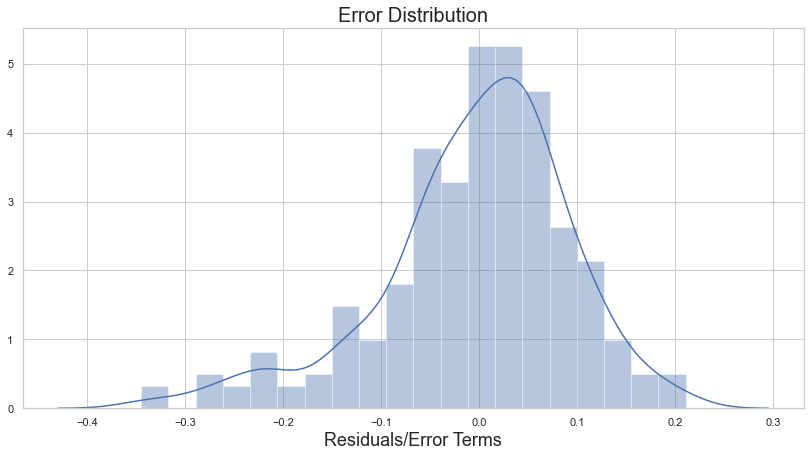

In [88]:
# plotting error distribution
plt.figure(figsize=(14,7))
sns.distplot(residuals_test, bins = 20)
plt.title('Error Distribution', fontsize = 20)
plt.xlabel('Residuals/Error Terms', fontsize=18)
plt.show()

We can observe that __errors follow a normal distribution__ centered around mean with zero.

#### Linear Relationship

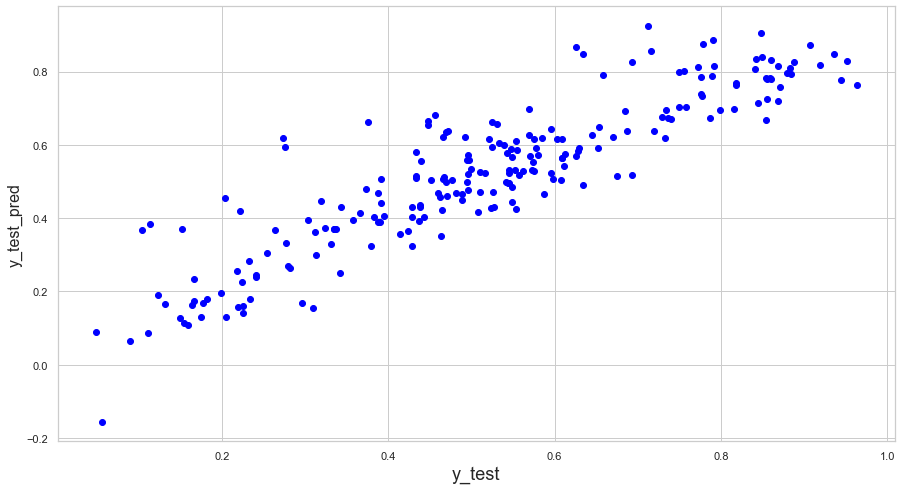

In [89]:
# Plotting y_test and y_test_pred to understand the spread.
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_test_pred, color='blue')
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

We can observe that the predicted values follow a linear relationship with the actual values.
##### Visualizing the Fit of the test set

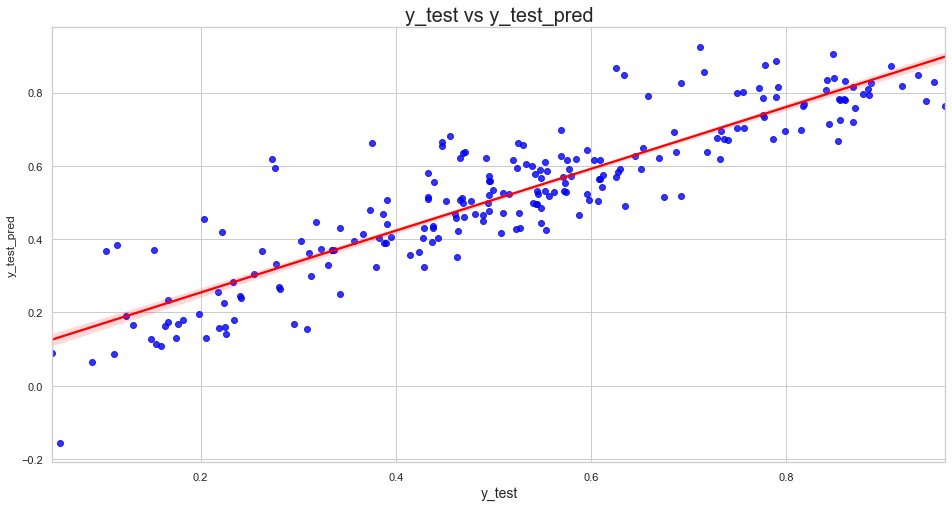

In [90]:
# Regression plot
plt.figure(figsize=(16, 8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_test_pred', fontsize=12)
plt.show()

We can observe that the variance of data points follow __NO particular pattern__.
### Root Mean Squared Error and Mean Absolute Error

In [91]:
# returns the mean squared error of the model and we take square root of the value
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09708621913692156

In [92]:
# returns the mean absolute error of the model
mean_absolute_error(y_test, y_test_pred)

0.07266925426815171

We observe that the Root Mean Squared Error value for the test dataset based on final model is 0.097 and Mean Absolute Error is 0.0727. This indicates the model is good.
### Final R-squared and Adjusted R-Squared for Test Set

In [93]:
# Final model summary
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     277.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          5.31e-188
Time:                        22:57:33   Log-Likelihood:                 494.94
No. Observations:                 510   AIC:                            -969.9
Df Residuals:                     500   BIC:                            -927.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2215      0.027      8.060      0.000       0.168       0.276
yr                  0.2292      0.008     27.575      0.000       0.213       0.246
temp                0.5755      0.020     28.127      0.000       0.535       0.616
hum                -0.1755      0.038     -4.574      0.000      -0.251      -0.100
windspeed          -0.1890      0.026     -7.202      0.000      -0.241      -0.137
Summer              0.0909      0.010      8.739      0.000       0.070       0.111
Winter              0.1391      0.011     13.114      0.000       0.118       0.160
Sep                 0.1034      0.016      6.506      0.000       0.072       0.135
Light_Rain_Snow    -0.2320      0.027     -8.617      0.000      -0.285      -0.179
Misty_Cloudy       -0.0499      0.011     -4.650      0.000      -0.071      -0.029
==============================================================================
Omnibus:                       71.035   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.087
Skew:                          -0.743   Prob(JB):                     6.36e-36
Kurtosis:                       5.328   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R-Squared

In [94]:
# evaluating Rsq for test set
r2_score(y_test, y_test_pred)

0.8015459824058995

#### Adjusted R-Squared

In [95]:
# shape of the final data set
X_test_new.shape

(219, 9)

In [96]:
# evaluating adjusted Rsq for test set

## Number of records/rows
N = X_test_new.shape[0]

## Number of features/predictors
p = X_test_new.shape[1]

## calculating R2
r2 = r2_score(y_test, y_test_pred)

## Calculating adjusted R2 using the formula
adj_r2 = 1 - (1-r2)*(N-1)/(N-p-1)
adj_r2

0.7930001156195506

## Conclusion and Recommendations 

| Measurement | Train Dataset | Test Dataset | __Difference__ |
| :- | :-: | :-: | -: |
| R-Squared | 83.3% | 80.15% | __3.15%__ |
| Adjusted R2 | 83.0% | 79.3% | __3.7%__ |

The Difference of parameters R-Squared and Adjusted R-Squared between Train and Test data sets is ___within limits i.e.., less than 5%___.<br>
Hence, we conclude that __Model 7 is the Best Model__ for generalizing various datasets.

### Equation for Best Fit Line

Based on the model 7 summary, we get the following equation for the best fit line:

cnt = 0.2215 + _0.2292*yr_ + _0.5755*temp_ - _0.1755*hum_ - _0.1890*windspeed_ + _0.0909*Summer_ + _0.1391*Winter_ + _0.1034*Sep_ - _0.2320*Light_Rain_Snow_ - _0.0499*Misty_Cloudy_

### Hypothesis Testing
- Null Hypothesis - __H<sub>0</sub>__: B<sub>1</sub> = B<sub>2</sub> = ..... = B<sub>n</sub> = 0
- Alternate Hypothesis - Atleast 1 coefficient is non zero - __H<sub>1</sub>__: B<sub>i</sub> != 0
- From the Model 7 summary, we can observe that all the ___coefficients are non zero___ and hence we __REJECT NULL HYPOTHESIS__

### Inference
- Tempearture (temp) has the highest coefficient of 0.5755 indicating a higher and significant impact on the demand for Bike rentals. The users prefer moderate temperature.
- Year (yr) has the next best coefficient indicating and increase in demand in 2019 compared to 2018. After the pandemic, the demand will spring back to normalcy.
- BoomBikes can expand its business in seasons like Summer and Fall.
- Users also prefer to rent the bike when the weather is clear or cloudy.